<a href="https://colab.research.google.com/github/free-dino/NLP-pytorch/blob/main/Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn

# Perceptron

In [55]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc1(x)).squeeze()

In [56]:
import torchsummary

In [57]:
model = Perceptron(input_dim=10)
torchsummary.summary(model, (10,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]              11
Total params: 11
Trainable params: 11
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [58]:
model

Perceptron(
  (fc1): Linear(in_features=10, out_features=1, bias=True)
)

# Activation Functions

## Sigmoid

$$
f(\mathbf x) = \frac{1}{1+e^{- \mathbf x}}
$$

In [5]:
import matplotlib.pyplot as plt

In [6]:
x = torch.arange(-5., 5., 0.1)
y = torch.sigmoid(x)

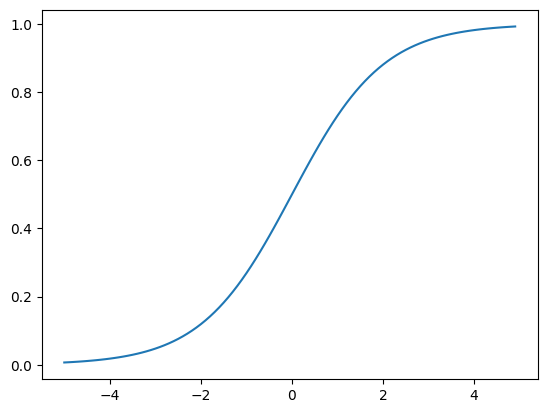

In [7]:
plt.plot(x.numpy(), y.numpy())
plt.show()

## Tanh
$$
f(\mathbf x) = \tanh \mathbf x = \frac{e^{\mathbf x} - e^{-\mathbf x}}{e^{\mathbf x} + e^{- \mathbf x}}
$$

In [8]:
x = torch.arange(-5., 5., 0.1)
y = torch.tanh(x)

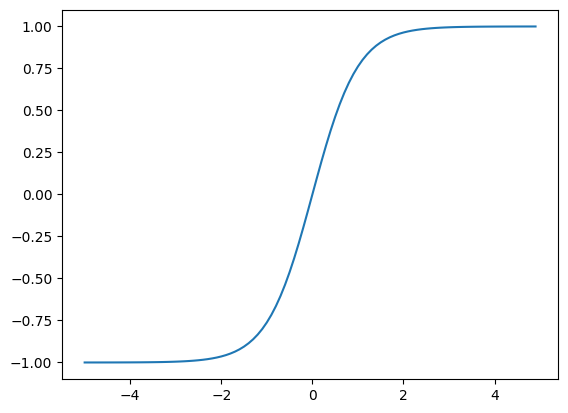

In [9]:
plt.plot(x.numpy(), y.numpy())
plt.show()

## ReLU

$$
f(\mathbf x) = \max(0,\mathbf x)
$$

In [10]:
relu = nn.ReLU()

In [11]:
x = torch.arange(-5., 5., 0.1)
y = relu(x)

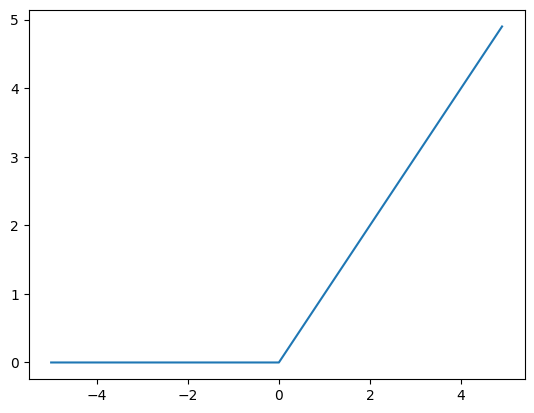

In [12]:
plt.plot(x.numpy(), y.numpy())
plt.show()

## Leaky ReLU and PReLU
They are nearly identical, the only different is the parameter in PReLU is learnable, and in LeakyReLu is a fixed constant.

$$f(\mathbf x) = \max(\mathbf x, \alpha \mathbf x)$$

In [13]:
leaky_relu = nn.LeakyReLU(0.1)

In [14]:
x = torch.arange(-5., 5., 0.1)
y = leaky_relu(x)

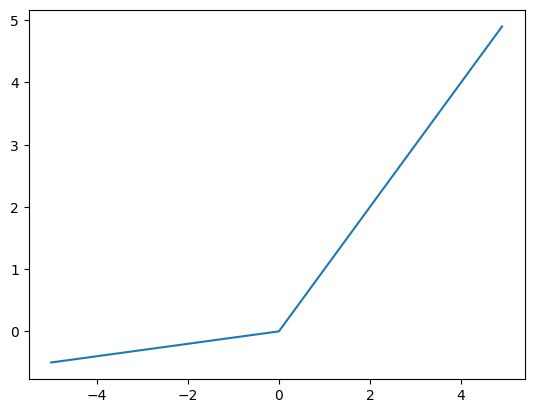

In [15]:
plt.plot(x.numpy(), y.numpy())
plt.show()

## Softmax

$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^k e^{x_j}}
$$

In [16]:
x_input = torch.randn(1,3)
y_output = torch.softmax(x_input, dim=1)

In [17]:
x_input

tensor([[-0.9540, -1.5467, -0.4879]])

In [18]:
y_output

tensor([[0.3178, 0.1757, 0.5065]])

In [19]:
torch.sum(y_output, dim=1)

tensor([1.])

# Loss functions

## Mean Squared Error Loss

$$
L_{MSE}(\mathbf y, \hat{\mathbf y}) = \frac 1 n \sum_{i=1}^n (\mathbf y - \hat{\mathbf y})^2
$$

In [21]:
mse_loss = nn.MSELoss()

In [29]:
outputs = torch.randn(3,5)
targets = torch.randn(3,5)

In [30]:
loss = mse_loss(outputs, targets)

In [31]:
loss

tensor(2.7850)

## Categorical Cross-Entropy Loss

$$
L_{cross\_entropy}(\mathbf y, \hat{\mathbf y}) = - \sum_{i} y_i \cdot \log (\hat {\mathbf y_i})
$$

In [32]:
ce_loss = nn.CrossEntropyLoss()

In [40]:
outputs = torch.randn(3, 5)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)

In [41]:
loss = ce_loss(outputs, targets)

In [42]:
outputs

tensor([[-0.7368,  0.5060,  0.0650,  1.3924,  0.2427],
        [ 0.7735,  1.6091,  0.8430,  0.9573,  0.0342],
        [-1.2542,  1.7143,  0.7979, -0.1723, -2.5451]])

In [43]:
loss

tensor(1.9343)

## Binary cross-entropy loss

In [44]:
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()

In [45]:
probabilities = sigmoid(torch.randn(4,1))
targets = torch.tensor([1,0,1,0], dtype=torch.float32).view(4,1)

In [49]:
loss = bce_loss(probabilities, targets)

In [50]:
loss

tensor(0.6406)

In [51]:
probabilities

tensor([[0.8181],
        [0.3721],
        [0.4137],
        [0.6370]])